In [1]:
%load_ext autoreload
%autoreload 2
import notebook_setup
from src.config import INTERIM_DATA_DIR, PROCESSED_DATA_DIR, REPORTS_DIR, EXTERNAL_DATA_DIR, MODELS_DIR
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["OMP_NUM_THREADS"] = "4"
os.environ["MKL_NUM_THREADS"] = "4"

BREPNET_NPZ_DIR = INTERIM_DATA_DIR / "features" / "brepnet"

2025-09-19 12:44:24.519 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: G:\Projects\Fusion-3D-CNN


Project root added to path: g:\Projects\Fusion-3D-CNN


In [2]:
import numpy as np
from pathlib import Path
files = list(Path(BREPNET_NPZ_DIR).glob("*.npz"))

feats = np.load(files[0], allow_pickle=True)

for k, v in feats.items():
    print(k, v.shape)

face_features (9, 7)
face_point_grids (9, 7, 10, 10)
edge_features (16, 10)
coedge_point_grids (31, 12, 10)
coedge_features (31, 1)
coedge_lcs (31, 4, 4)
coedge_scale_factors (31,)
coedge_reverse_flags (31,)
next (31,)
mate (31,)
face (31,)
edge (31,)


In [3]:
from src.modeling.ssl_graph_brep.data_module.brep_dataset import BRepNPZDataset

dataset = BRepNPZDataset(BREPNET_NPZ_DIR)
print(f"Dataset length: {len(dataset)}")
g = dataset.get(0)
print(g)

for k, v in g.items():
    print(k, v.shape if hasattr(v, "shape") else v)

Dataset length: 129
HeteroData(
  face={
    x=[9, 7],
    uv=[9, 7, 10, 10],
    num_nodes=9,
  },
  edge={
    x=[16, 10],
    num_nodes=16,
  },
  coedge={
    x=[31, 1],
    grid=[31, 12, 10],
    lcs=[31, 4, 4],
    scale=[31],
    reverse=[31],
    num_nodes=31,
  },
  (coedge, next, coedge)={ edge_index=[2, 31] },
  (coedge, mate, coedge)={ edge_index=[2, 31] },
  (coedge, to_face, face)={ edge_index=[2, 31] },
  (coedge, to_edge, edge)={ edge_index=[2, 31] }
)


In [4]:
from src.modeling.ssl_graph_brep.data_module.brep_data_loader import BRepDataModule
data_module = BRepDataModule(BREPNET_NPZ_DIR, batch_size=32, num_workers=0)
data_module.setup()

batch = next(iter(data_module.train_dataloader()))
print(batch)

HeteroDataBatch(
  face={
    x=[2358, 7],
    uv=[2358, 7, 10, 10],
    num_nodes=2358,
    batch=[2358],
    ptr=[33],
  },
  edge={
    x=[6513, 10],
    num_nodes=6513,
    batch=[6513],
    ptr=[33],
  },
  coedge={
    x=[12999, 1],
    grid=[12999, 12, 10],
    lcs=[12999, 4, 4],
    scale=[12999],
    reverse=[12999],
    num_nodes=12999,
    batch=[12999],
    ptr=[33],
  },
  (coedge, next, coedge)={ edge_index=[2, 12999] },
  (coedge, mate, coedge)={ edge_index=[2, 12999] },
  (coedge, to_face, face)={ edge_index=[2, 12999] },
  (coedge, to_edge, edge)={ edge_index=[2, 12999] }
)


In [7]:
from src.modeling.ssl_graph_brep import train


train.run(
    npz_brep_dir=BREPNET_NPZ_DIR,
    batch_size=32,
    epochs=50,
    num_workers=4,
    proj_dim=128,
    lr=1e-3,
    hidden=64,
    tau=0.05,
    lambda_topo_next=1.5,
    lambda_topo_mate=1.5,
    aug_p=0.15,
    topo_tau=0.05,
    weight_decay=1e-4,
    validation_ratio=0.2,
    test_ratio=0.1,
    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Kaktus\.conda\envs\brepnet\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:751: Checkpoint directory G:\Projects\Fusion-3D-CNN\models\ssl_brep exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type                | Params | Mode 
------------------------------------------------------------
0 | face_enc    | UVNetSurfaceEncoder | 390 K  | train
1 | coedge_enc  | UVNetCurveEncoder   | 142 K  | train
2 | edge_lin    | Linear              | 704    | train
3 | gnn         | BRepHeteroGNN       | 25.5 K | train
4 | projector   | Sequential          | 33.0 K | train
5 | scorer_next | BilinearScorer      | 16.4 K | train
6 | scorer_mate | BilinearScorer      | 16.4 K | train
------------------------------------------------------------
624 K     Trainable params
0         Non-trainable params
624 K     Total params
2.4

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


SystemExit: 1

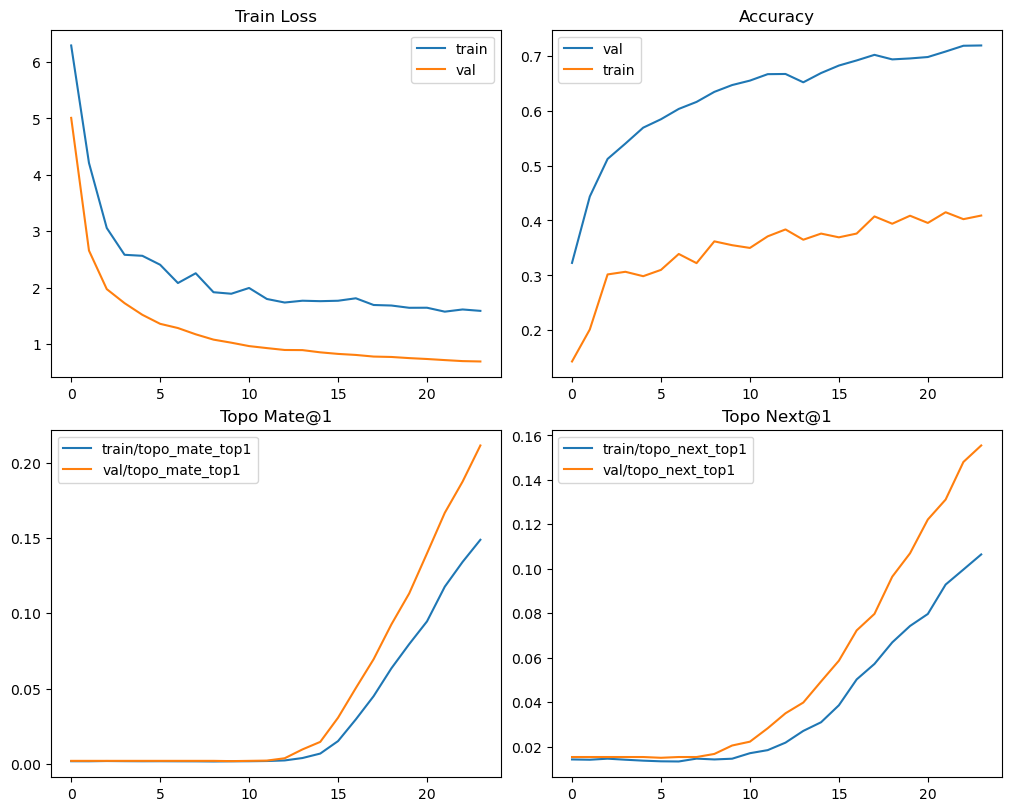

In [5]:
from src.modeling.ssl_graph_brep import plots

metrics_csv = REPORTS_DIR / "ssl_brep" / "version_1" / "metrics.csv"

plots.plot_training_curves(metrics_csv)

In [7]:
from src.modeling.ssl_graph_brep.inference import extract_embeddings, topk_similar, search_by_name

ckpt = MODELS_DIR / "ssl_brep" / "ssl-brep-epoch=23-val_infoNCE_acc=0.719.ckpt"
# BREPNET_NPZ_DIR = PROCESSED_DATA_DIR / "test" / "features" / "42. Ejector"
data_dir = Path(BREPNET_NPZ_DIR)
ids, E = extract_embeddings(ckpt, data_dir)

topk_idx = topk_similar(E, k=10)
for i, nn_idx in enumerate(topk_idx[:15]):
    print("Query:", ids[i])
    print("Top-10:", [ids[j] for j in nn_idx])
    print("---")

Query: 42. Ejector-01.prt
Top-10: ['42. Ejector-01.prt', '42. Ejector-05.prt', '42. Ejector-06.prt', '42. Ejector-04.prt', '42. Ejector-02', '42. Ejector-07.prt', '42. Ejector-08.prt', '42. Ejector-10.prt', '42. Ejector-09.prt', '42. Ejector.prt']
---
Query: 42. Ejector-02
Top-10: ['42. Ejector-02', '42. Ejector-03.prt', '42. Ejector-01.prt', '42. Ejector-05.prt', '42. Ejector-06.prt', '42. Ejector-04.prt', '42. Ejector-07.prt', '42. Ejector-08.prt', '42. Ejector.prt', '42. Ejector-10.prt']
---
Query: 42. Ejector-03.prt
Top-10: ['42. Ejector-03.prt', '42. Ejector-02', '42. Ejector-04.prt', '42. Ejector-01.prt', '42. Ejector-09.prt', '42. Ejector-05.prt', '42. Ejector-10.prt', '42. Ejector-06.prt', '42. Ejector.prt', '42. Ejector-07.prt']
---
Query: 42. Ejector-04.prt
Top-10: ['42. Ejector-04.prt', '42. Ejector-09.prt', '42. Ejector-01.prt', '42. Ejector-03.prt', '42. Ejector-10.prt', '42. Ejector-05.prt', '42. Ejector-06.prt', '42. Ejector-02', '42. Ejector-07.prt', '42. Ejector-08.prt

In [ ]:
import pandas as pd

class_name = "44. Extractor Pin"

BREPNET_NPZ_DIR = PROCESSED_DATA_DIR / "test" / "features" / class_name
REPORTS_DIR
ids, E = extract_embeddings(model_ckpt=ckpt, data_dir=BREPNET_NPZ_DIR)


results = search_by_name(ids, E, query_name=f"{class_name}_body_1", include_self=True, max_print=30)

report_name = 'graph_report.xlsx'

df = pd.DataFrame(results, columns=['q', 'acc', 'name'] )
report_path = REPORTS_DIR / report_name  # 'graph_report.xlsx'
mode = 'a' if Path(report_path).exists() else 'w'  # append или создать
with pd.ExcelWriter(report_path, engine="openpyxl", mode=mode) as writer:
    df.to_excel(writer, sheet_name=class_name, index=False)


Запрос: 43. Extractor_body_1
   1. 100.00%  43. Extractor_body_1
   2.  99.94%  43. Extractor-02_body_1
   3.  99.94%  43. Extractor-01_body_1
   4.  99.66%  43. Extractor-03_body_1
   5.  99.38%  43. Extractor-07_body_1
   6.  99.18%  43. Extractor-04_body_1
   7.  99.05%  43. Extractor-08_body_1
   8.  98.93%  43. Extractor-05_body_1
   9.  98.90%  43. Extractor-06_body_1
  10.  98.84%  Кожух_body_1
  11.  98.84%  Вкладыш_body_1
  12.  98.63%  Кольцо цевья_body_1
  13.  98.54%  Крышка ствольной коробки_body_1
  14.  98.48%  43. Extractor-09_body_1
  15.  98.30%  Курок_body_1
  16.  98.26%  Крючок спусковой_body_1
  17.  98.15%  Компенсатор_body_1
  18.  98.09%  43. Extractor-10_body_1
  19.  98.07%  Основание замедлителя_body_1
  20.  98.06%  Накладка ствольная_body_1
  21.  97.87%  Выбрасыватель_body_1
  22.  97.76%  Автоспуск_body_1
  23.  97.62%  Гайка рукаятки_body_1
  24.  97.07%  Опорный выступ_body_1
  25.  95.90%  Кольцо накладки заднее_body_1
  26.  94.72%  Карабин_body_1
 